In [92]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

def normalize_columns(dfs, cols): # Normalize any column assuming both max and min aren't zero
    for df in dfs:
        for col in cols:
            df[f'{col}_norm'] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

def get_log_return(dfs): # Get log return for a dataset
    for df in dfs:
        df['Log_Return'] = np.log(df['Close']).diff()

def get_simple_return(dfs):
    for df in dfs:
        df['Simple Return'] = df['Close'].pct_change()

In [ ]:
RAW_DATA_DIR = Path("../data/raw")

# Load Data
AAPL = pd.read_csv(RAW_DATA_DIR / "AAPL.csv", index_col='Date')
NVDA = pd.read_csv(RAW_DATA_DIR / "NVDA.csv", index_col='Date')


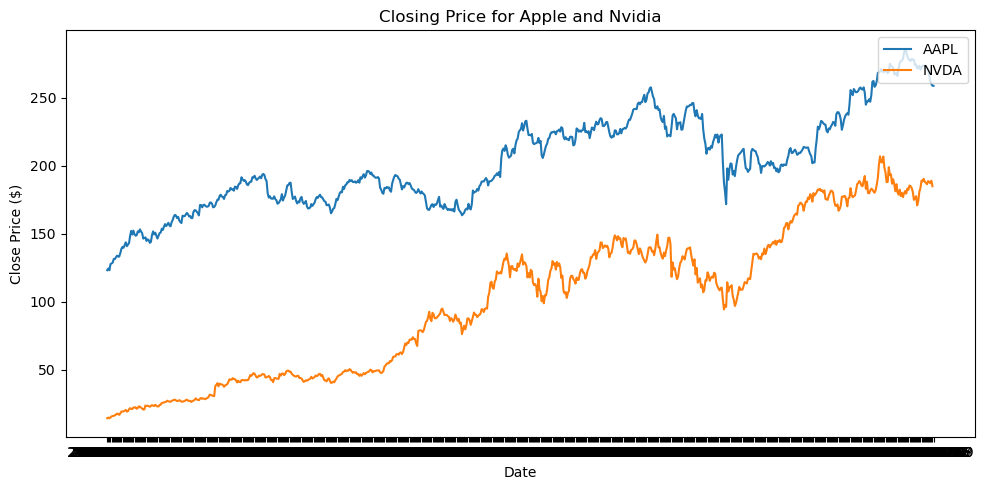

In [ ]:
# Investigate AAPL and NVDA closing prices

fig, ax = plt.subplots(figsize=(10,5), sharex=True, sharey=True)

ax.plot(AAPL.index, AAPL['Close'], label='AAPL')
ax.plot(NVDA.index, NVDA['Close'], label='NVDA')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price ($)')
ax.set_title('Closing Price for Apple and Nvidia')

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Both stocks grew in price, but Apple is still just more valuable based on USD

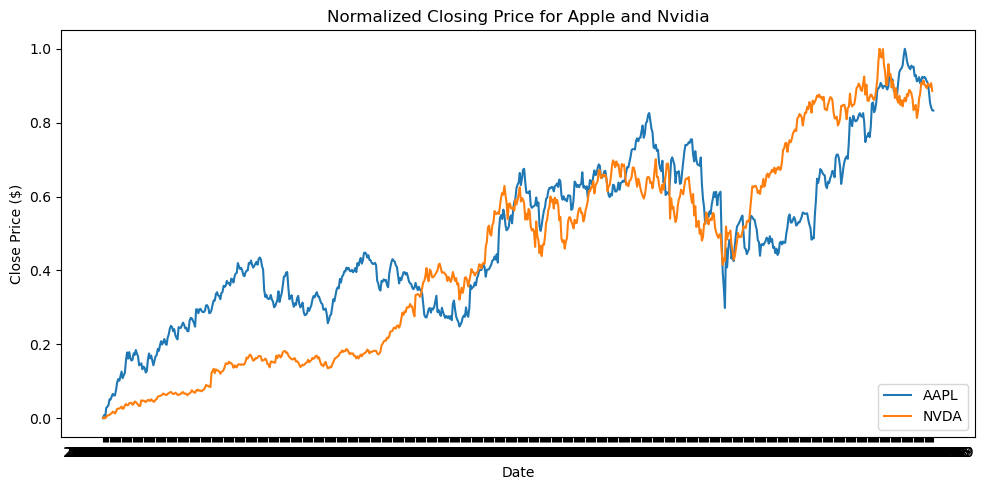

In [ ]:
normalize_columns([AAPL, NVDA], cols=['Close']) # Get normalized closing values to even out scale

fig, ax = plt.subplots(figsize=(10,5), sharex=True, sharey=True)

ax.plot(AAPL.index, AAPL['Close_norm'], label='AAPL')
ax.plot(NVDA.index, NVDA['Close_norm'], label='NVDA')
ax.set_xlabel('Date')
ax.set_ylabel('Normalized Close Price')
ax.set_title('Normalized Closing Price for Apple and Nvidia')

plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# NVDA is growing more quickly in the last year or so

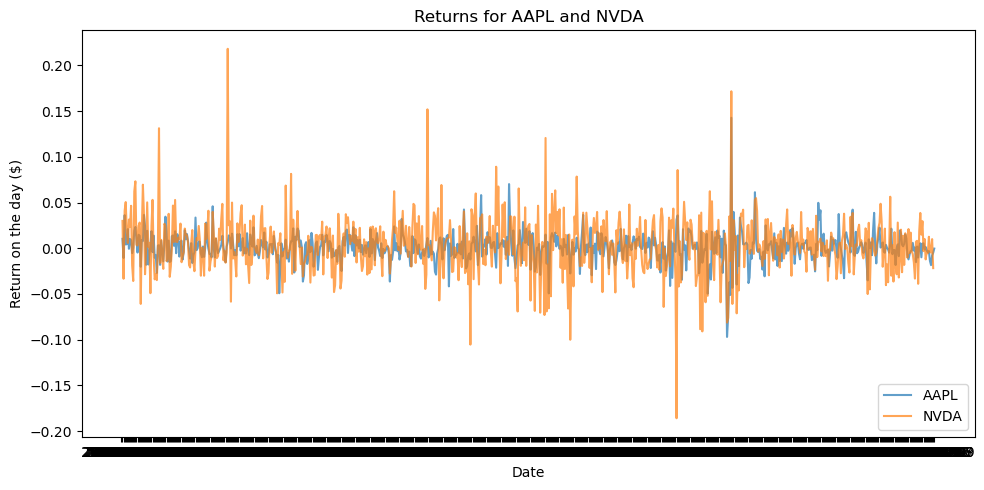

In [93]:
# Lets look at the returns for AAPL and NVDA

get_log_return([AAPL, NVDA])

fig, ax = plt.subplots(figsize=(10,5), sharex=True, sharey=True)

ax.plot(AAPL.index, AAPL['Log_Return'], label='AAPL', alpha=0.7)
ax.plot(NVDA.index, NVDA['Log_Return'], label='NVDA', alpha=0.7)
ax.set_xlabel('Date')
ax.set_ylabel('Return on the day ($)')
ax.set_title('Returns for AAPL and NVDA')

plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# NVDA log returns are much larger than AAPL. Given ties with AI industry, NVDA being more volatile makes sense. 
# Apple is relatively shielded from AI hype since they aren't a front runner, just a tech giant

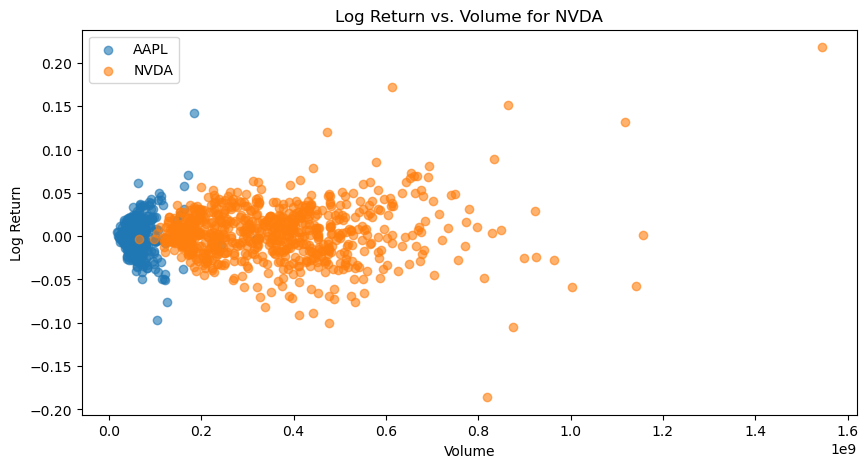

Apples average volume is 56722320.73878628
Nvidias average volume is 355961698.1505945


In [107]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(AAPL['Volume'], AAPL['Log_Return'], alpha=0.6, label='AAPL')
ax.scatter(NVDA['Volume'], NVDA['Log_Return'], alpha=0.6, label='NVDA')
ax.set_ylabel('Log Return')
ax.set_xlabel('Volume')
ax.set_title('Log Return vs. Volume for NVDA')

plt.legend(loc='best')
plt.show()

print(f'Apples average volume is {AAPL["Volume"].mean()}')
print(f'Nvidias average volume is {NVDA["Volume"].mean()}')

# NVDA has way more volume, I'm going to normalize volume to see if more volume yeilds larger log returns

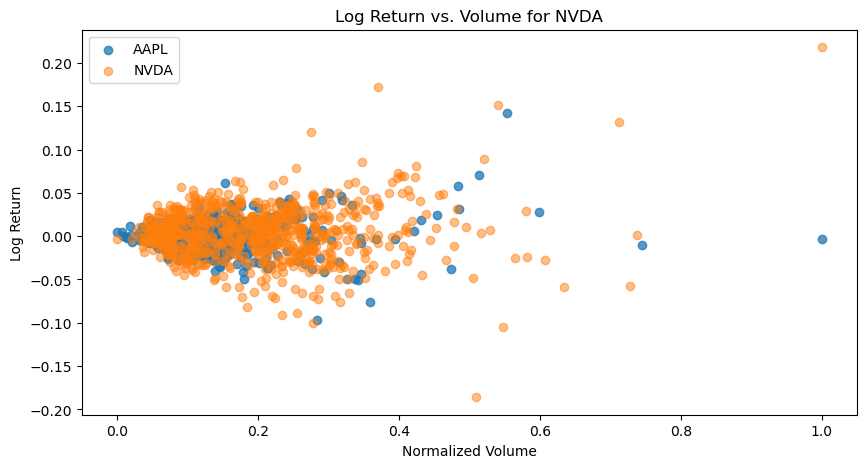

Apples average normalized volume is 0.12904149705035148
Nvidias average normalized volume is 0.1964533523297215


In [ ]:
normalize_columns([AAPL, NVDA], cols=['Volume'])

fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(AAPL['Volume_norm'], AAPL['Log_Return'], alpha=0.75, label='AAPL')
ax.scatter(NVDA['Volume_norm'], NVDA['Log_Return'], alpha=0.5, label='NVDA')
ax.set_ylabel('Log Return')
ax.set_xlabel('Normalized Volume')
ax.set_title('Log Return vs. Volume for NVDA')

plt.legend(loc='best')
plt.show()

print(f'Apples average normalized volume is {AAPL["Volume_norm"].mean()}')
print(f'Nvidias average normalized volume is {NVDA["Volume_norm"].mean()}')

# On an average trading day apple has much tighter returns i.e. lower volatility
# NVDA has more frequent trading days with wild returns

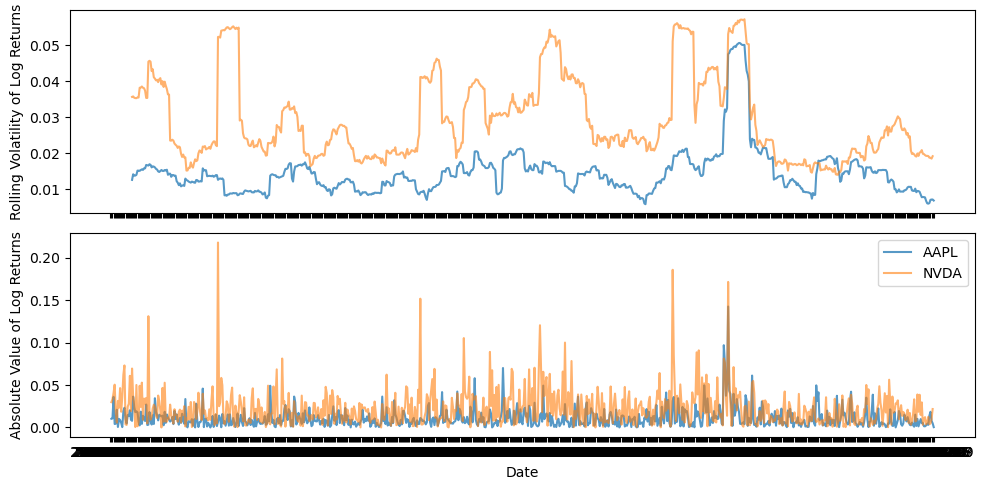

In [ ]:
AAPL_rolling_vol = AAPL['Log_Return'].rolling(20).std()
NVDA_rolling_vol = NVDA['Log_Return'].rolling(20).std()

fig, ax = plt.subplots(nrows=2, figsize=(10, 5), sharex=True, sharey=False)

ax[0].plot(AAPL.index, AAPL_rolling_vol, alpha=0.75, label='AAPL')
ax[0].plot(NVDA.index, NVDA_rolling_vol, alpha=0.6, label='NVDA')
ax[0].set_ylabel('Rolling Volatility of Log Returns')

ax[1].plot(AAPL.index, AAPL['Log_Return'].abs(), alpha=0.75, label='AAPL')
ax[1].plot(NVDA.index, NVDA['Log_Return'].abs(), alpha=0.6, label='NVDA')
ax[1].set_ylabel('Absolute Value of Log Returns')
ax[1].set_xlabel('Date')

plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Higher average volatility  on NVDA correlates with generally higher absolute returns. Certain periods where volatility in one equity is reveresed in the other or when 
# volatility in one is absent in the other. However, AAPL has lower returns overall on average.